Introduction: We are Team Thomas Greville, with members:
Yazda Cokgor (yscokgor@berkeley.edu, GIT username: yscokgor)
etc.

Topic & GOur topic is the analysis of AIDS/ HIVs in Botswana.
als: 

Our project focused on anthe effect of AIDS/  HIV on populations, the difference in AIDS/ HIV prevelance on the sexes, on agriculture and exploring why this may be the case and how it differs in opposed to Zimbabwe.

Enjoy our code!1]

[Goal 2]

In [24]:
#Installation of datahubs necessary
%pip install wbdata
import wbdata

%pip install cufflinks # IF NECESSARY
import cufflinks as cf
cf.go_offline()

import numpy as np

#Botswana Code is "BWA"
#Zimbabwe Code is "ZWE"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
#Getting Indicator for Gender Statistics 
wbdata.get_sources()

gen_stats = 14
indicators_genstat = wbdata.get_indicators (source = gen_stats)
indicators_genstat

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [12]:
#Getting Indicator for Health Nutririon and Population Statistics 
health_nut = 16
indicators_healthnut = wbdata.get_indicators (source = health_nut)
indicators_healthnut

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------------------------------
HD.HCI.OVRL           Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE        Human Capital Index (HCI), Female (scale 0-1)
HD.HCI.OVRL.LB        Human Capital Index (HCI), Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.FE     Human Capital Index (HCI), Female, Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.MA     Human Capital Index (HCI), Male, Lower Bound (scale 0-1)
HD.HCI.OVRL.MA        Human Capital Index (HCI), Male (scale 0-1)
HD.HCI.OVRL.UB        Human Capital Index (HCI), Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.FE     Human Capital Index (HCI), Female, Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.MA     Human Capital Index (HCI), Male, Upper Bound (scale 0-1)
NY.GNP.PCAP.CD        GNI per capita, Atlas method (current US$)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT

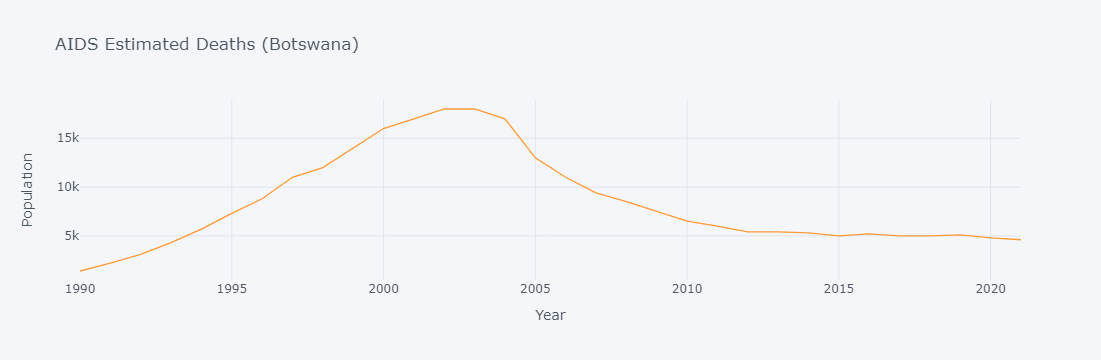

In [54]:
#Aids Estimated Deaths Plotted (Botswana)

aids_death = {"SH.DYN.AIDS.DH" : "BWA"}
aids = wbdata.get_dataframe(aids_death, country = "BWA")
aids.index = aids.index.astype(int)
aids = aids .dropna().sort_index()
aids.iplot(title="AIDS Estimated Deaths (Botswana)",xTitle='Year',yTitle='Population')

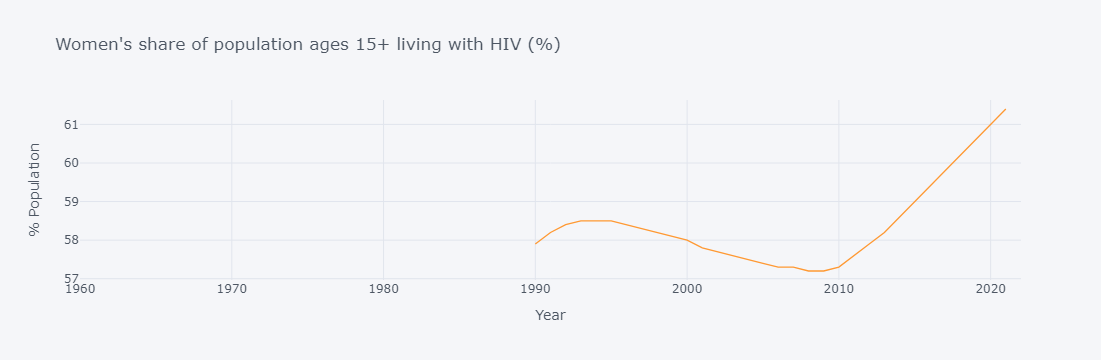

In [15]:
# Women's share of population ages 15+ living with HIV (%) (Botswana)

woman_hiv = {"SH.DYN.AIDS.FE.ZS" : "BWA"}
whiv = wbdata.get_dataframe(woman_hiv, country = "BWA")

whiv.index = whiv.index.astype(int)
whiv.iplot(title="Women's share of population ages 15+ living with HIV (%)",xTitle='Year',yTitle='% Population')


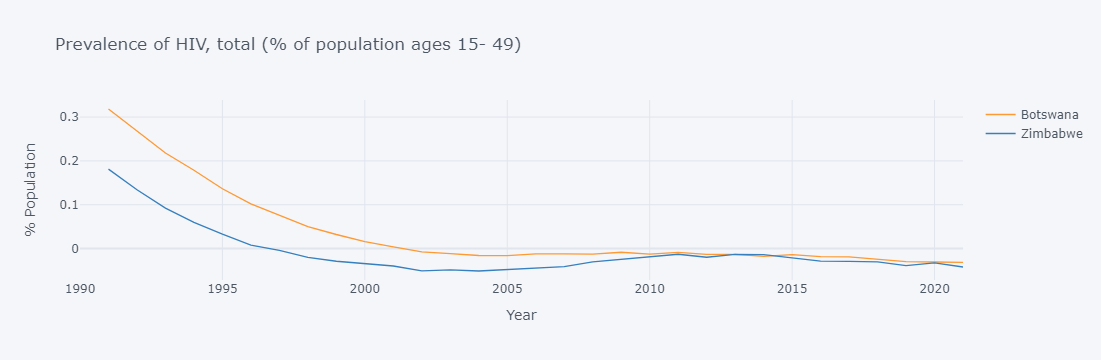

In [52]:
#prevelance of HIV total (% of population ages 15- 49) for both Botswana and Zimbabwe

labels = {"SH.DYN.AIDS.ZS" : "Prevelance of HIV, total (% of population ages 15 - 49)"}

countries =  {"BWA" : "Botswana",
            "ZWE" : "Zimbabwe",
           }

data = wbdata.get_dataframe(labels, country = countries).squeeze().dropna()

data = data.unstack('country')
data.index = data.index.astype(int)
data = data.sort_index()

np.log(data).diff().iplot(title = "Prevalence of HIV, total (% of population ages 15- 49)",
                          yTitle = "% Population",
                          xTitle = "Year")

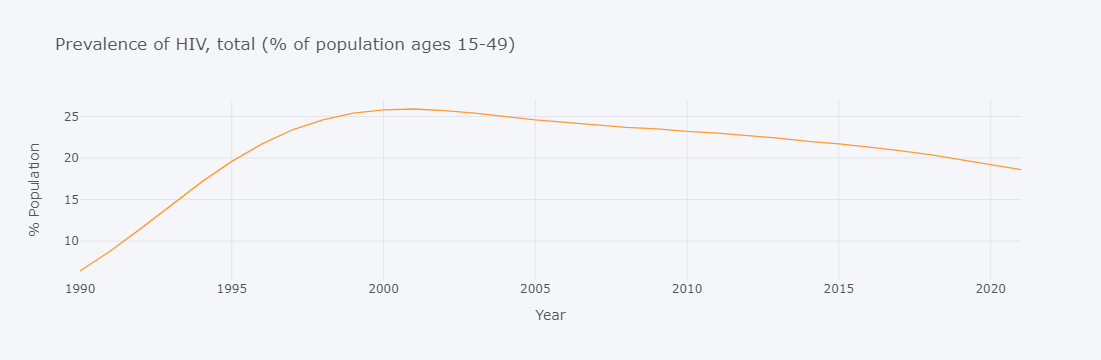

In [49]:
#Prevalence of HIV, total (% of population ages 15-49) (Botswana)
hiv_prev = {"SH.DYN.AIDS.ZS" : "BWA"}
prev = wbdata.get_dataframe(hiv_prev, country = "BWA")

prev = prev.dropna().sort_index()
prev.index = prev.index.astype(int)
prev.iplot(title ="Prevalence of HIV, total (% of population ages 15-49)",xTitle='Year',yTitle='% Population')

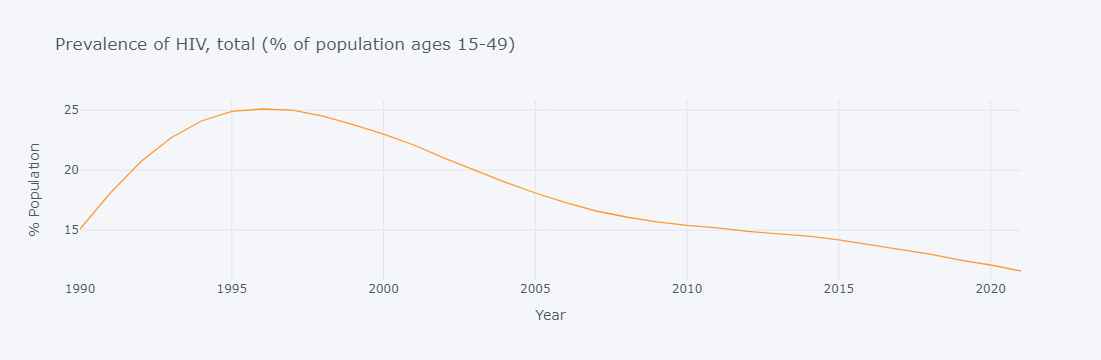

In [53]:
#Prevelance of HIV total (% of pop. ages 15 -49) (Zimbabwe)

wbdata.get_countries("ZWE")


hiv_prevz = {"SH.DYN.AIDS.ZS" : "ZWE"}
prevz = wbdata.get_dataframe(hiv_prevz, country = "ZWE")
prevz = prevz.dropna().sort_index()
prevz.index = prevz.index.astype(int)
prevz.iplot(title ="Prevalence of HIV, total (% of population ages 15-49)",xTitle='Year',yTitle='% Population')

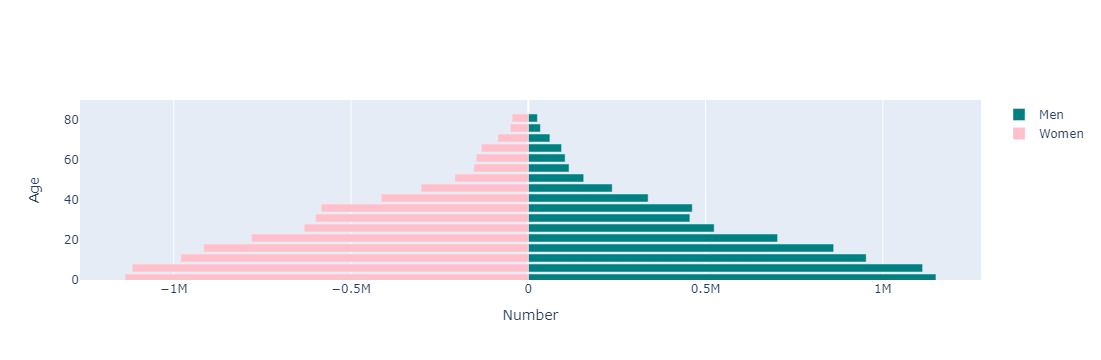

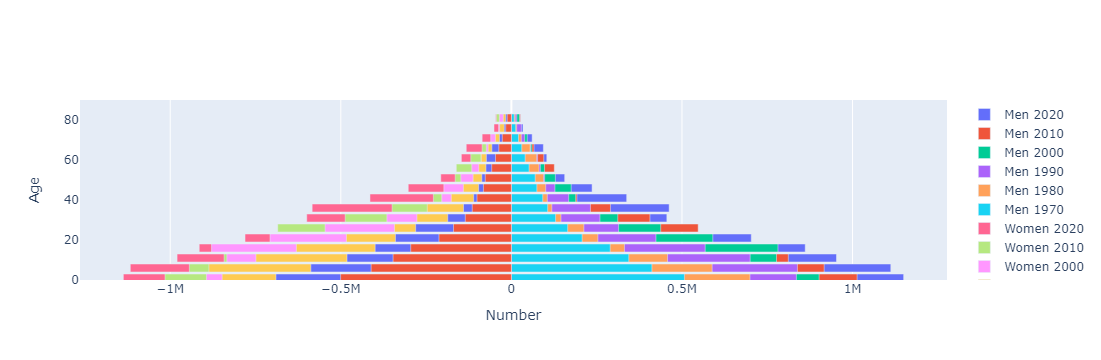

In [71]:
def pop_pyramid_df(years, ctry):
    age_rangez = []
    # Ranges top out at 80, and go in five year increments
    for i in years:
        age_rangez.append(f"{i:02d}"+f"{i+4:02d}")
    
    age_rangez.append("80UP")
    
    male_variablez = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_rangez}
    female_variablez = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_rangez}
    
    variablez = male_variablez
    variablez.update(female_variablez)
    
    dfz = wbdata.get_dataframe(variablez,country=ctry)
    return df.query("date=='2020'").sum(axis=0)

pop_pyramid_df(range(0,80,5), "ZWE")

import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))


year = 2020

binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_rangez],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_rangez],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=binz, layout=layout))


years = range(2020,1960,-10)

# This makes a list of graphs, year by year
binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_rangez],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years]

binz += [go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_rangez],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=binz, layout=layout))


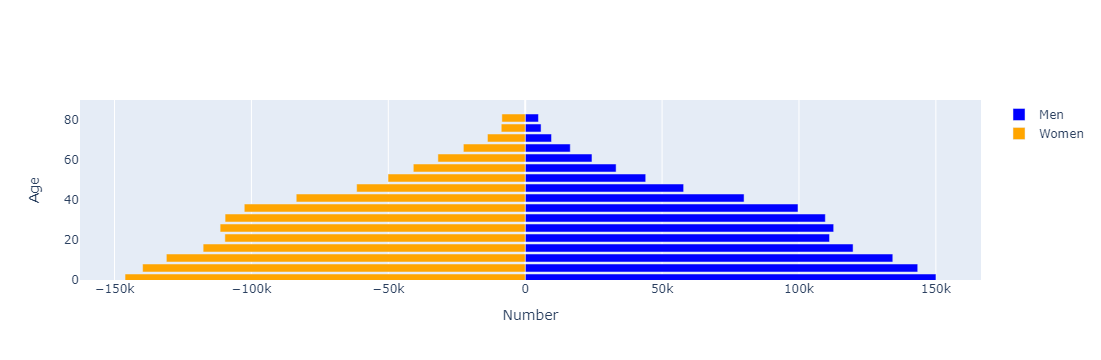

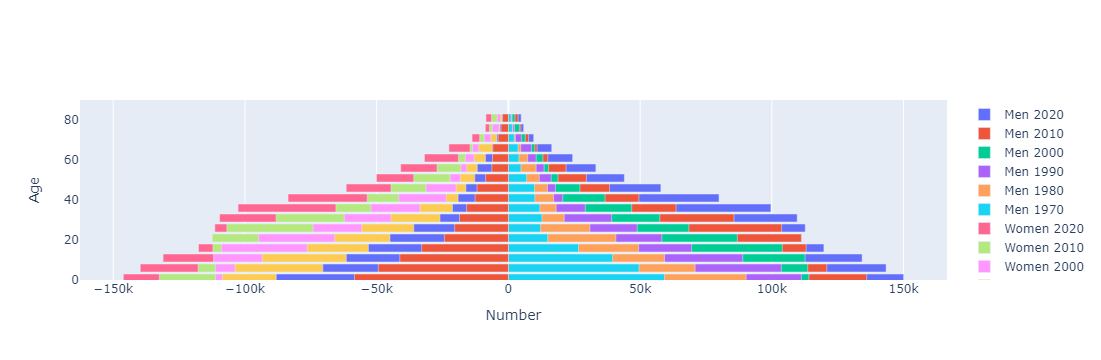

In [73]:
def pop_pyramid_df(years, ctry):
    age_rangez = []
    # Ranges top out at 80, and go in five year increments
    for i in years:
        age_rangez.append(f"{i:02d}"+f"{i+4:02d}")
    
    age_rangez.append("80UP")
    
    male_variablez = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_rangez}
    female_variablez = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_rangez}
    
    variablez = male_variablez
    variablez.update(female_variablez)
    
    dfz = wbdata.get_dataframe(variablez,country=ctry)
    return df.query("date=='2020'").sum(axis=0)

pop_pyramid_df(range(0,80,5), "BWA")

import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))
year = 2020

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='blue'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

#Gets pop. pyramid by year 
years = range(2020,1960,-10)

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years]
          
bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=bins, layout=layout))
